# Representações Vetoriais do Espaço (parte 2 de 2)

Neste Jupyter, analisaremos formas geométricas irregulares.

Para tanto, utilizaremos de algumas bibliotecas que permitem uma maior abstração sobre estas entidades espaciais

In [79]:
# Instalando algumas bibliotecas de manipulação de dados espaciais

# Instalando a Biblioteca geopandas
!pip install pandas
print('\n')

# Instalando a Biblioteca geopandas
!pip install geopandas
print('\n')


# Instalando a Biblioteca Cartopy
!pip install cartopy
print('\n')


# Instalando a Biblioteca xarray
!pip install xarray[complete]
print('\n')

# Importando Bibliotecas

In [80]:
# numpy
import numpy as np

# tipagem
from typing import List

# cartopy
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader # Import shapefiles

# matplotlib
from matplotlib import patches
import matplotlib.pyplot as plt

# geopoandas

import geopandas as gpd

# shapely

import shapely


# Tipos de Dados Espaciais
  * Vetoriais
  * Matriciais

## Interpretação

Portanto, um dado matricial é um array de N dimensões

# Dados Vetoriais

Os dados vetoriais podem ser categorizados pela sua representação espacial:


*   Ponto (e.g., ponto de gps)
*   Linha (e.g., rodovia)
*   Polígono (e.g., ilha)
*   Multi-Pontos (e.g., capitais estaduais do Brasil)
*   Multi-Linha (e.g., malha viária)
*   Multi-Polígono (e.g., país que contém vários estados)


coordenada x:  1.0 coordenada y : 2.0


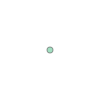

In [81]:
# Exemplo de Ponto
xcoord, ycoord = 1,2

ponto = shapely.geometry.Point(xcoord, ycoord)

print("coordenada x: ", ponto.x, "coordenada y :", ponto.y)

ponto

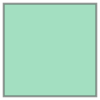

In [82]:
# Exemplo de Polígono (quadrado)
quadrado = shapely.geometry.box(2,2,4,4)

quadrado

## Multi-polígonos regulares

Mounted at /content/gdrive


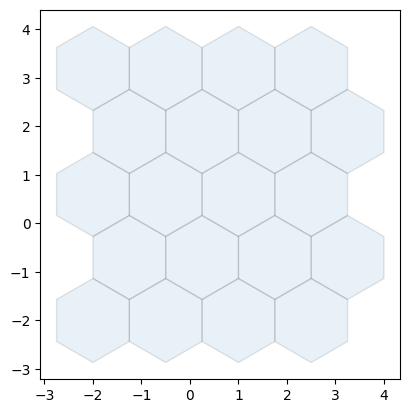

In [83]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)


libdir = r'/content/gdrive/My\ Drive/Profissao/Colab_Notebooks/Python_Scripts/representacoesEspaciais/'
# %run {libdir}Representacoes_Vetoriais_1_de_2.ipynb

hexagons = gerarMalhaDePoligonosRegulares()

In [84]:
# convertendo matplotlib.patches into shapely

from shapely.geometry import Polygon

def regularPolygonToShapely(regPolygon) -> List[Polygon]:
  path = regPolygon.get_path()
  # Retornando os vértices do polígono
  points = path.vertices
  # obtendo a matriz afim de transformação
    # que converte coordenadas do sistema de coordenadas do Polígono
    # para o sistema de coordenadas de dados (transData)

  transformer = regPolygon.get_patch_transform()

  return transformer.transform(points)


def regularPolygonToGeoSeries(hexagons: List[patches.RegularPolygon]) -> gpd.GeoSeries:

  shapelyHexagons = [ ]

  for hexagon in hexagons:

    hexagonCoordinates = regularPolygonToShapely(hexagon)

    shapelyHexagon = Polygon(hexagonCoordinates)

    shapelyHexagons.append(shapelyHexagon)

  return gpd.GeoSeries(shapelyHexagons)


geoSeries = regularPolygonToGeoSeries(hexagons)

# Plotando as geometrias convertidas
gdf = geoSeries.to_frame().reset_index()
gdf["MyData"] = np.random.randn(gdf.shape[0])
gdf.head()


,index,0,MyData
0,0,"POLYGON ((-2.00000 -1.13397, -2.75000 -1.56699...",0.578313
1,1,"POLYGON ((-1.25000 0.16506, -2.00000 -0.26795,...",-0.808907
2,2,"POLYGON ((-2.00000 1.46410, -2.75000 1.03109, ...",1.256501
3,3,"POLYGON ((-1.25000 2.76314, -2.00000 2.33013, ...",-0.238918
4,4,"POLYGON ((-2.00000 4.06218, -2.75000 3.62917, ...",-1.150575


Text(0.5, 1.0, 'Index')

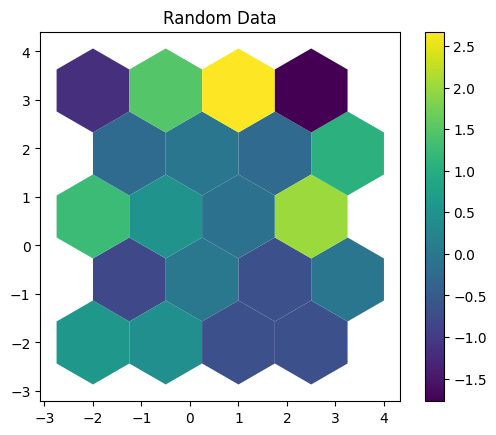

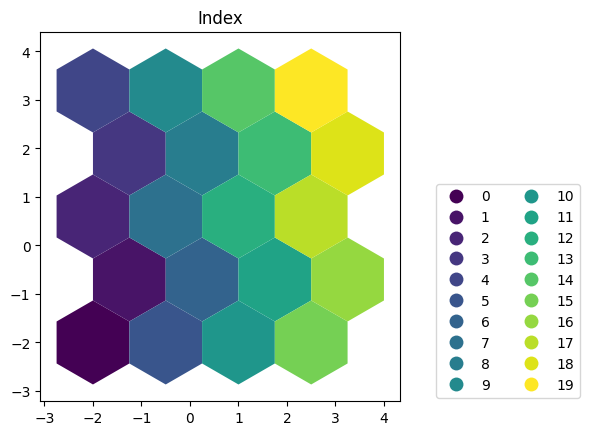

In [85]:
matplotlibAxes = gdf.plot(column="MyData", legend=True)
matplotlibAxes.set_title("Random Data")
matplotlibAxes2 = gdf.plot(column="index", legend=True, categorical=True, cmap="viridis", legend_kwds={'loc': (1.1, 0.01,),
                                                                                                       'ncols': 2})
matplotlibAxes2.set_title("Index")


## Multi-polígonos ireregulares

### Baixando o shapefile dos estados brasileiros

In [86]:
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
print('\n')

# Descomprimindo o arquivo de shapefile dos estados brasileiros
!unzip -o br_unidades_da_federacao.zip
print('\n')

# Baixando o shapefile dos estados / províncias mundiais
!wget -c https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
print('\n')

# Descomprimindo o arquivo de shapefile dos estados / províncias mundiais
!unzip -o ne_10m_admin_1_states_provinces.zip
print('\n')

--2023-09-11 13:38:52--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10912177 (10M) [application/zip]
Saving to: ‘br_unidades_da_federacao.zip’

br_unidades_da_fede 100%[===================>]  10.41M  8.88MB/s    in 1.2s    

2023-09-11 13:38:53 (8.88 MB/s) - ‘br_unidades_da_federacao.zip’ saved [10912177/10912177]



Archive:  br_unidades_da_federacao.zip
 extracting: BR_UF_2019.cpg          
  inflating: BR_UF_2019.dbf          
  inflating: BR_UF_2019.prj          
  inflating: BR_UF_2019.shp          
  inflating: BR_UF_2019.shx          


--2023-09-11 13:38:54--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_prov

In [87]:
# lendo dados via geopandas

gdf = gpd.read_file('BR_UF_2019.shp')

gdf.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4..."
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828..."
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620..."
3,14,Roraima,RR,Norte,"POLYGON ((-63.96008 2.47313, -63.96041 2.47416..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."


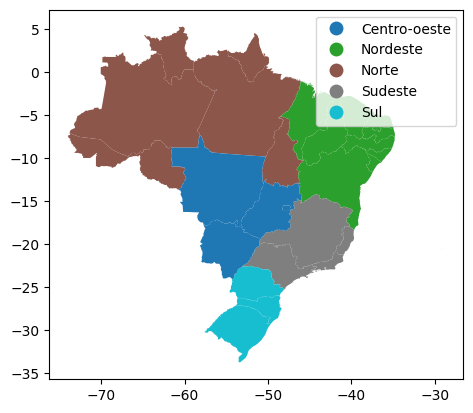

In [88]:
# Visualização dos estados do Brasil
gdf.plot(categorical=True, column = "NM_REGIAO", legend=True)
plt.show()


# Visualizando dados geométricos com dados matriciais

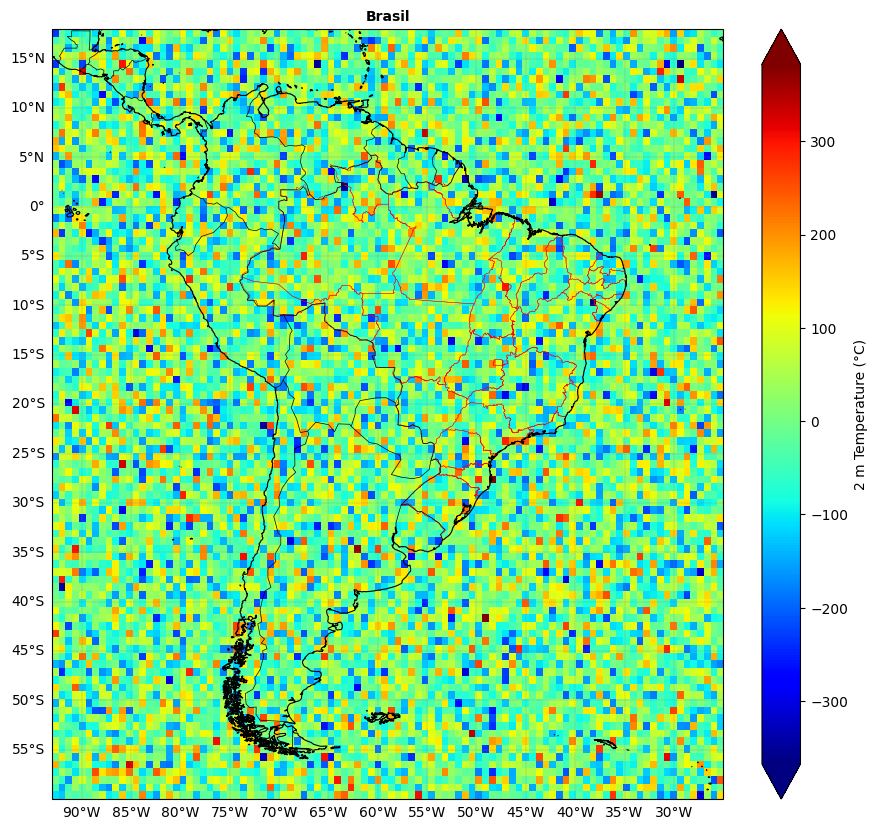

In [91]:


#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

#-----------------------------------------------------------------------------------------------------------
# Add a shapefile

  # plotando via matplotb
    # ax.add_geometries(gdf.geometry, ccrs.PlateCarree(), edgecolor='red',facecolor='none', linewidth=0.3)

  # plotando via geopandas

gdf.plot(ax=ax, transform = ccrs.PlateCarree(), edgecolor='red',facecolor='none', linewidth=0.3)

#-----------------------------------------------------------------------------------------------------------

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False


#-----------------------------------------------------------------------------------------------------------
# Criando dados fictícios
xsize = 100
ysize= 100
array2D = np.random.randn(xsize , ysize)*100



# Define de contour interval
vmin = np.min(array2D.flatten())
vmax = np.max(array2D.flatten())

#-----------------------------------------------------------------------------------------------------------

# Plot the contours
# Plot the image
# Define the image extent

extent = [-93.0, -60.00, -25.00, 18.00]
img_extent = [extent[0], extent[2], extent[1], extent[3]]

img = ax.imshow(array2D, origin='lower', extent=img_extent, vmin=vmin, vmax=vmax, cmap='jet')

# Add a colorbar
plt.colorbar(img, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title("Brasil", fontweight='bold',fontsize=10, loc='center')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_5.png')

# Show the image
plt.show()